<a href="https://colab.research.google.com/github/23subbhashit/Time-Series-prediction-Different-Ways/blob/master/Copy_of_Copy_of_Autots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install auto_ts

     |████████████████████████████████| 51kB 3.2MB/s 
     |████████████████████████████████| 1.3MB 12.2MB/s 
     |████████████████████████████████| 962kB 18.5MB/s 
  Created wheel for pyflux: filename=pyflux-0.4.15-cp36-cp36m-linux_x86_64.whl size=4656566 sha256=dd9cb65dfa0b68933fa35c101934f86cb70997589f2e61a9d1ba939721740c9d
  Stored in directory: /root/.cache/pip/wheels/36/24/09/d18fa4f926cc90598d23ebd09fb4b0fd7b3dd1d2f506b952de
Successfully built pyflux


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
import pandas as pd

In [ ]:
pd.__version__

'1.0.5'

In [ ]:
s = input('State:')

State:Nagaland


In [ ]:
c = input('Commodity:')
df=pd.read_csv("/content/gdrive/My Drive/ML/New states cleaned/"+s+'/'+c+".csv")
df.head()

Commodity:Potato


,Unnamed: 0,Price Date,States,Commodity,Modal Price (Rs./Quintal)
0,0,2014-01-15,Nagaland,Potato,1250.000000
1,1,2014-01-16,Nagaland,Potato,1725.000000
2,2,2014-01-17,Nagaland,Potato,1916.666667
3,3,2014-01-20,Nagaland,Potato,1250.000000
4,4,2014-01-23,Nagaland,Potato,1250.000000


In [ ]:
if 'State' in df.columns:
  a = 'State'
elif 'States' in df.columns:
  a = 'States'
df.drop(["Unnamed: 0","Commodity",a],axis=1,inplace=True)

In [ ]:
df.columns=["Date","Price"]

In [ ]:
df.head()

,Date,Price
0,2014-01-15,1250.000000
1,2014-01-16,1725.000000
2,2014-01-17,1916.666667
3,2014-01-20,1250.000000
4,2014-01-23,1250.000000


In [ ]:
df1 = df[ df['Date'] > '2019-31-12']
s = df[ df['Date'] == df1.iloc[0][0]].index[0]
df1.iloc[0][0]

'2020-01-18'

In [ ]:
train=df.iloc[:s,:]
train

,Date,Price
0,2014-01-15,1250.000000
1,2014-01-16,1725.000000
2,2014-01-17,1916.666667
3,2014-01-20,1250.000000
4,2014-01-23,1250.000000
...,...,...
868,2019-12-26,1100.000000
869,2019-12-27,1200.000000
870,2019-12-28,1100.000000
871,2019-12-30,1200.000000


In [ ]:
test=df.iloc[s:,:]
test

,Date,Price
873,2020-01-18,4500.000000
874,2020-01-25,4500.000000
875,2020-01-27,3100.000000
876,2020-01-31,5300.000000
877,2020-02-01,4500.000000
878,2020-02-03,2900.000000
879,2020-02-10,3100.000000
880,2020-02-11,1000.000000
881,2020-02-12,1200.000000
882,2020-02-13,1100.000000


In [ ]:
import auto_ts as AT

Input is data frame. Performing Time Series Analysis
    Dataframe loaded successfully. Shape of data set = (873, 1)
    Target variable = Price
Time Interval is given as Days

Running Facebook Prophet Model...
Preparing Time Series data for FB Prophet: sample row before
              Price
Date              
2014-01-15  1250.0
Time Series data: sample row after transformation
           ds       y
0 2014-01-15  1250.0
    Fit-Predict data (shape=(873, 2)) with Confidence Interval = 0.95...
Building Forecast dataframe. Forecast Period = 360


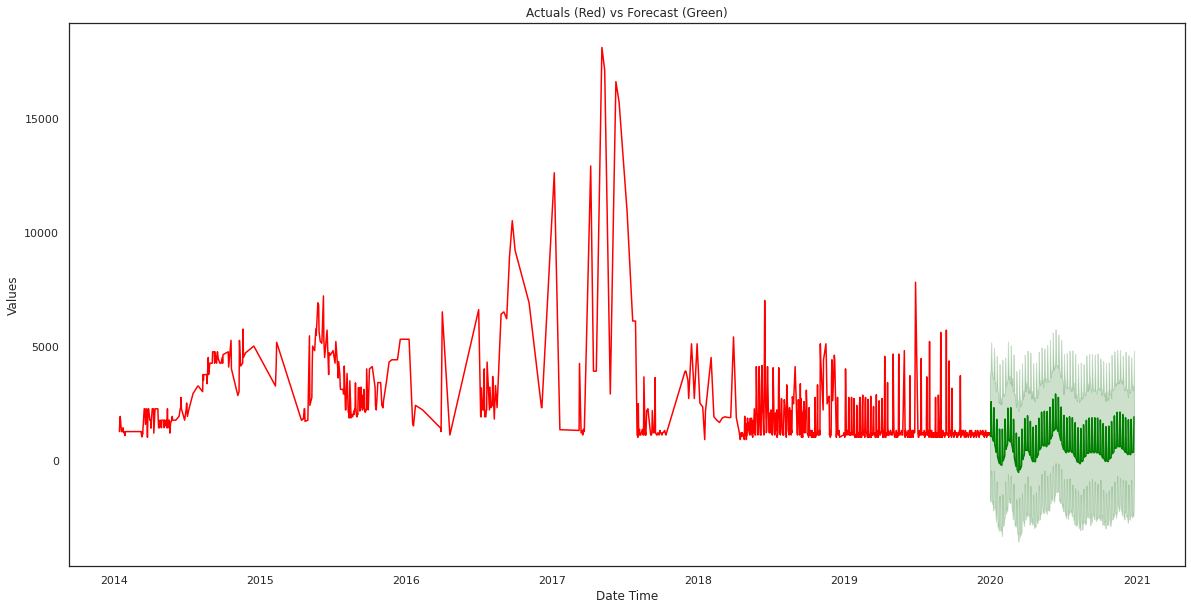

    RMSE = 116.46
    Std Deviation of Originals = 1,829.17
    Normalized RMSE = 6%

Running PyFlux Model...
Cycling through various (p,d,q) parameters

Best Params Selected (based on rmse): (3, 0, 0)
Dynamic 360-period Forecasts:
    RMSE = 1,526.88
    Std Deviation of Originals = 2,115.46
    Normalized RMSE = 72%

Running Non Seasonal ARIMA Model...

Differencing = 0
 Iteration 0 completed...
 Iteration 10 completed...
    Best AR order p = 2, MA order q = 3, Interim metric = 8949.130

Differencing = 1
 Iteration 20 completed...
 Iteration 30 completed...
    Best AR order p = 2, MA order q = 3, Interim metric = 8959.314

Best model is: Non Seasonal ARIMA(2,0,3), aic = 8949.130
####    Fitting best model for full data set now. Will take time... ######
    ARIMA model error: predictions not available.

Running Seasonal SARIMAX Model...
Building a Seasonal Model...

    Finding best Non-Seasonal pdq Parameters:

Differencing = 0
    Iteration 0 completed...
    Best AR order p = 3, 

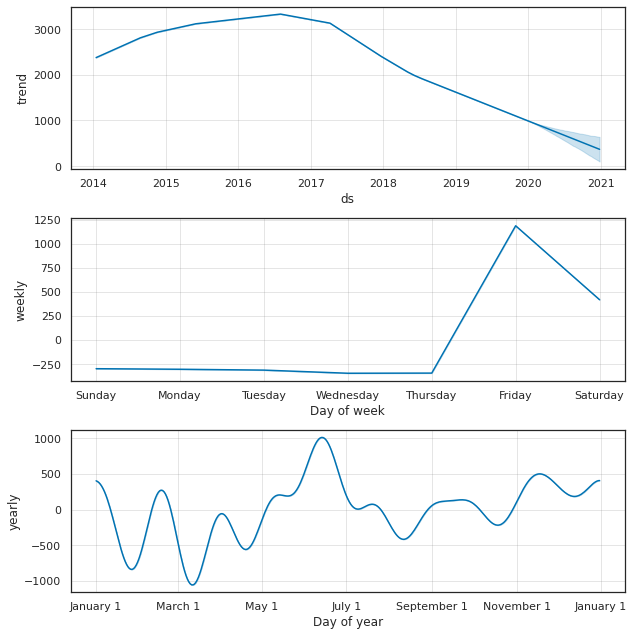

In [ ]:
ml=AT.Auto_Timeseries(train,"Date","Price",",",score_type="rmse",forecast_period=360,time_interval="Days",model_type="best",seasonality=True)